# Plotting behavorial data generated by OpenSesame

In the data wrangling tutorial we covered how to import and manipulate a dataframe. We also saw some ways to get an idea how your data looks like by grouping the data. In this tutorial we will go a step further by also visualizing the data. Therefore, we will use python's most widely used visualization package: [matplotlib](https://matplotlib.org/). Let's first load the data. We will use the same data as in the data wrangling tutorial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import cleaned dataframe from the datawrangling module
df = pd.read_csv('data/df_cleaned.csv')

# Print first 10 rows of the dataframe
df.head(10)

,subject_nr,block,session,congruency_transition_type,congruency_type,correct,response_time,task_transition_type,task_type,response
0,1,1,lowswitch,NaN,incongruent,0,1482.9738,NaN,parity,None
1,1,1,lowswitch,congruency-switch,congruent,1,706.7057,task-switch,magnitude,a
2,1,1,lowswitch,congruency-repetition,congruent,1,855.6105,task-switch,parity,a
3,1,1,lowswitch,congruency-switch,incongruent,1,867.8947,task-repetition,parity,a
4,1,1,lowswitch,congruency-repetition,incongruent,1,1078.9412,task-switch,magnitude,a
5,1,1,lowswitch,congruency-repetition,incongruent,1,819.4645,task-repetition,magnitude,a
6,1,1,lowswitch,congruency-repetition,incongruent,0,1481.3830,task-switch,parity,None
7,1,1,lowswitch,congruency-switch,congruent,0,1483.3642,task-repetition,parity,None
8,1,1,lowswitch,congruency-repetition,congruent,1,804.7673,task-repetition,parity,a
9,1,1,lowswitch,congruency-repetition,congruent,1,847.6291,task-repetition,parity,a


In [5]:
plt.style.use('default')

As you learned in the Python Lessons, there are three ways of using matplotlib: the seaborn way (quick, beautiful but limited options), the procedural way (also quick but a bit less rigid) and the object-oriented way (slowest but most flexible). Let's visualize switch costs using these three methods whilst minimizing the amount of code we use, so we can compare them:

<AxesSubplot:xlabel='subject_nr', ylabel='response_time'>

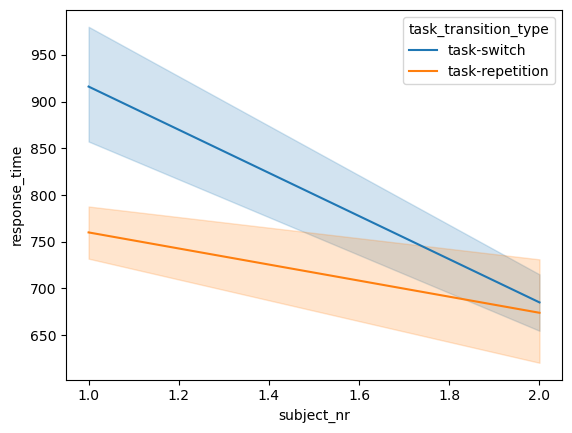

In [6]:
# Here, the sns.lineplot function tells seaborn we want a line plot
sns.lineplot(data=df,
             x='subject_nr',
             y='response_time',
             hue='task_transition_type') # Which groups to separate and give different colors (hue stands for color)

As you can see, with only one line of code we can visualize the switch cost difference. However, seaborn also does things we didn't ask for: it calculates the mean response time and gives us an error bar. We can explicitly change these settings of course, but it does illustrate a difference in coding philosophy: with the object-oriented way you build from the ground up, whilst in the seaborn (and the lesser extent the procedural way) you built from the top down. Let's see what happens with the procedural approach:

<AxesSubplot:xlabel='subject_nr'>

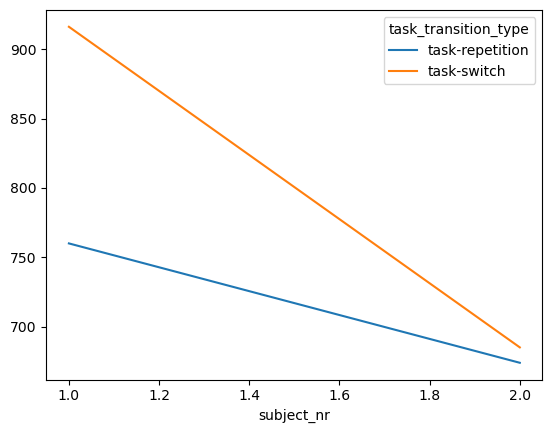

In [7]:
# Because the procedural approach doesn't have the handy "hue" parameter, we first need to make the grouping ourselves
pivot = df.pivot_table(values = "response_time",
                       index= "subject_nr",
                       columns="task_transition_type",
                       aggfunc=np.mean)

# Then, use the pivot table to plot, pyplot automatically takes "index" as x-values, "values" as y-axis and "columns" as grouping
pivot.plot(kind="line")

Alright, we don't get the error bars, and no label for the y-axis, but other than that looks pretty similar to the seaborn plot. You can change the style to whatever you like most. See the styles available [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Below you can change the style and look at the new output right away:

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='subject_nr'>

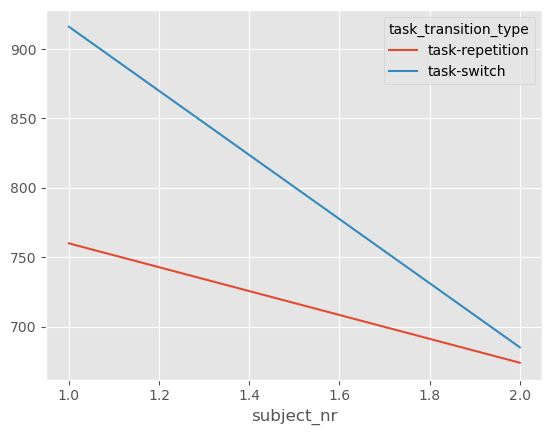

In [9]:
print(plt.style.available) # Print out all available styles
plt.style.use('ggplot') # Set style for the rest of the script, change 'default' to something else

# Another way of making a quick plot (this code is the same as above, only way shorter but less explicit)
df.pivot_table("response_time", "subject_nr", "task_transition_type").plot(kind="line")

Alright, let's set it back to default:

In [10]:
plt.style.use('default') # Set style for the rest of the script, change 'default' to something else

Some tweaking needs to be done now since the plots assume that "subject_nr" is a continuous variable, and in some styles not all the x-ticks are shown. But again, with a few lines of code we get a pretty good idea of how the switch cost looks like between conditions. Let's now try the object-oriented approach:

subject_nr  task_transition_type
1           task-repetition         759.981108
            task-switch             916.154525
2           task-repetition         673.920843
            task-switch             685.029797
Name: response_time, dtype: float64


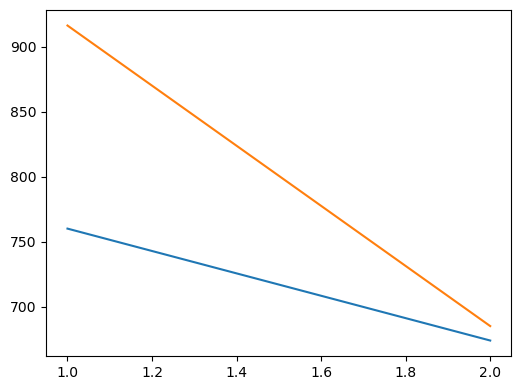

In [18]:
# Group dataframe by both subject number and task_transition_type
df_group = df.groupby(['subject_nr','task_transition_type']).response_time.mean()
print(df_group)

# Unstack the `task_transition_type` index, to place it as columns
df_oo = df_group.unstack(level='task_transition_type')

# Make the framework and place in "fig" and "ax" variables
fig, ax = plt.subplots(figsize=(6, 4.5))

# Populate the "ax" variable with the dataframe
ax.plot(df_oo)

# Show dataframe
plt.show()

As you can see you need the most code for the object-oriented approach. Furthermore, it doesn't give you anything you don't ask for. We didn't specify if we wanted a legend, or if we wanted x- and y-labels, so we will then need to add this manually. It is however the best way to make your plots, since (1) the procedural and seaborn approach are built on the object-oriented syntax, so you can make changes to these plots with your understanding of object-oriented matplotlib usage, and (2) it is the most reproducible way to code your plots, since you make everything what you do explicit.

It's important to be aware of the difference between these approaches, as when you google solutions for your matplotlib problems, you will often encounter solutions for all three approaches. However, when you are coding in an object-oriented matter, simply inputting procedural code will not work, and vice-versa! For the rest of the tutorial, we will continue with the object-oriented approach, unless it is really inconvenient to do so (as you will see at the end of the tutorial). For now, let's improve the plot we made above:

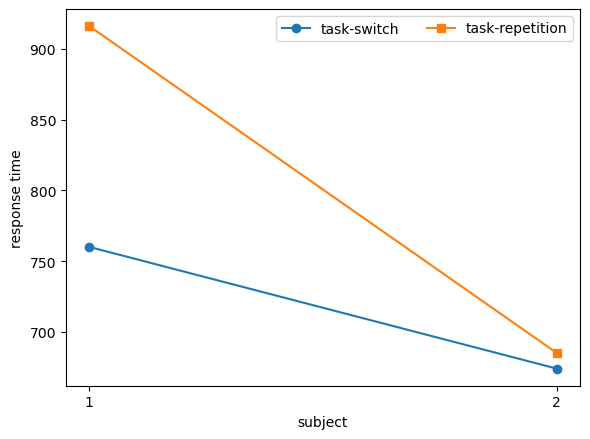

In [20]:
# Group dataframe by both subject number and task_transition_type
df_group = df.groupby(['subject_nr','task_transition_type']).response_time.mean()

# Unstack the `task_transition_type` index, to place it as columns
df_oo = df_group.unstack(level='task_transition_type')

# Make the framework and place in "fig" and "ax" variables
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(df_oo)

# Set axis labels on the "ax" variable
ax.set_xlabel('subject')
ax.set_ylabel('response time')

# Set different markers for each group; "o" refers to "circle", "s" refers to "square", can you see what's going on here?
markers = ['o', 's']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# Explicitly state which xticks to use, here we only want "1" and "2" because those are our subject numbers
ax.set_xticks(ticks=[1,2])

# Update legend
ax.legend(ax.get_lines(), ["task-switch", "task-repetition"], loc='best', ncol=2)

# Show the dataframe in a tight layout
plt.tight_layout()

Let's continue. Next thing to check is how the response time distribution looks like. Many statistical tests assume a normal distribution, but is that the case in our response time distribution as well? Using matplotlib.pyplot and the object-oriented approach we can easily make a histogram plot by specifying the column that should be plotted:

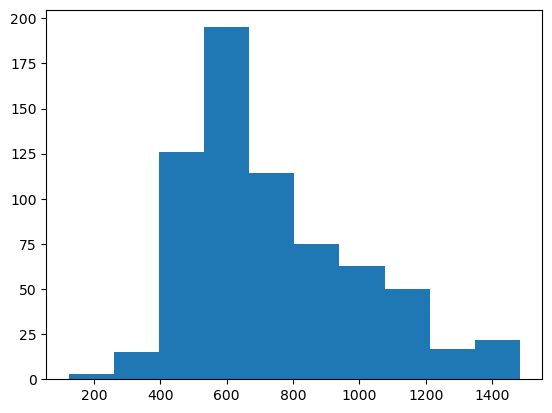

In [21]:
# Make the framework and place in "fig" and "ax" variables
fig, ax = plt.subplots()

# Specify that the column "response_time" of dataframe "df" needs to be plotted in a histogram "hist". Place this in "ax"
ax.hist(df['response_time'])

# Show the plot
plt.show()

That's a good start. However, we are still missing lots of things in this plot. There are no labels for the x- and y-axis, there is no title for the plot, I think we need a few more bins, the graph could be a bit wider, and I am also not happy about the background colour. This is where the real power of object-oriented coding in matplotlib shows itself: you can customize virtually anything you want in these plots.

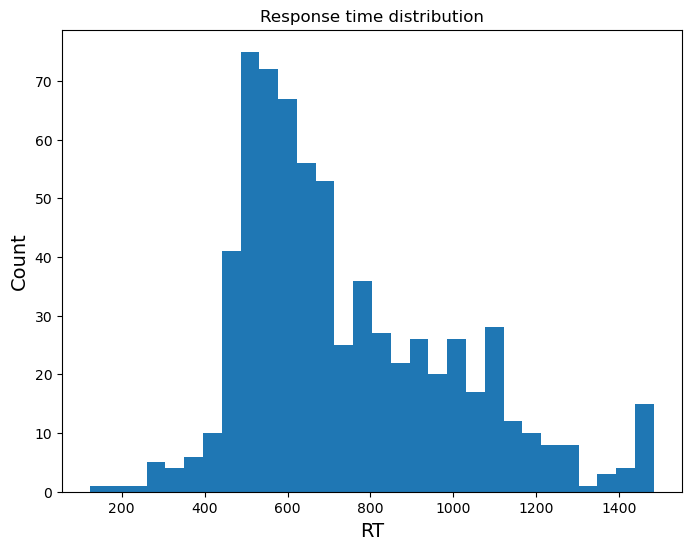

In [24]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
                       facecolor='grey', # Change background colour to grey
                       frameon=False)

ax.hist(df['response_time'],
         bins=30) # Bins defines the amount of bins you want to plot

ax.set_xlabel("RT", size=14) # label on the x-axis, size defines font size
ax.set_ylabel("Count", size=14) # label on the y-axis, size defines font size
ax.set_title("Response time distribution") # title of the plot
plt.show()

We can also make overlays to compare two distributions. Let's for example see how the distribution of correct versus incorrect trials look like.

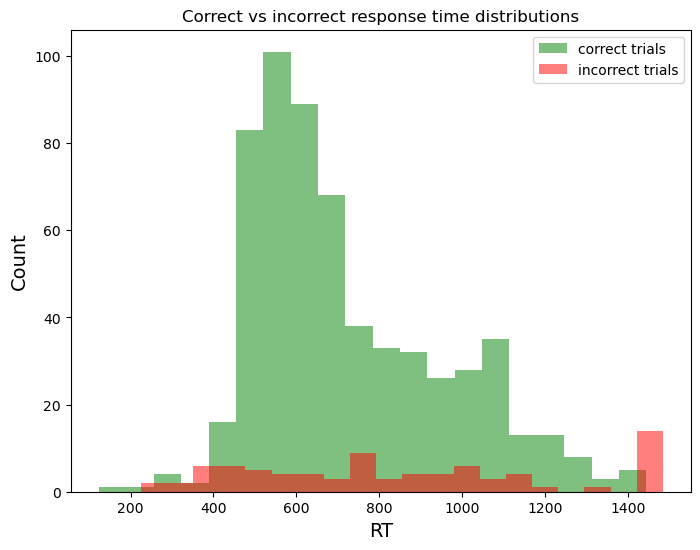

In [25]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
           facecolor='grey', # Change background colour to grey
           frameon=False) # Remove background behind the bars

# Here we make two dataframes, one with only correct trials and another with only incorrect trials
correct_trials = df[df['correct'] == 1]
incorrect_trials = df[df['correct'] == 0]

# Then we make two histograms. Matplotlib will place items you make in the same figure in the same "ax" if you define it so.
ax.hist(correct_trials['response_time'],
         bins=20,
         alpha=0.5, # This defines opacity of the bars
         color='green',
         label="correct trials") # This defines the label that the bar gets, for the legend

ax.hist(incorrect_trials['response_time'],
         bins=20,
         alpha=0.5,
         color='red',
         label="incorrect trials")

ax.set_xlabel("RT", size=14)
ax.set_ylabel("Count", size=14)
ax.set_title("Correct vs incorrect response time distributions")
ax.legend(loc='upper right') # This tells matplotlib to create a legend, and place it on the upper right field of the plot
plt.show()

Three things to note here:
- Our data seems to be *right-skewed*, and not normally distributed
- There are some unrealistically quick responses (under 200 milliseconds)
- There is a big peak just at the end of the trial of wrong responses (in the last bin)

The first two points we will have to consider during our outlier analysis. The last point however, should get you alarmed. It could be that participants have amazing internal clocks that tell them that the maximum trial time is almost over, so they must just guess. However, what happened here is that our logger gave the maximum response time (1500ms) to trials where there was **no response**. Spotting anomalies like this is one of the key advantages of plotting as much as possible. Luckily, we have a column that shows which button was pressed called *response*. Let's fix this error:

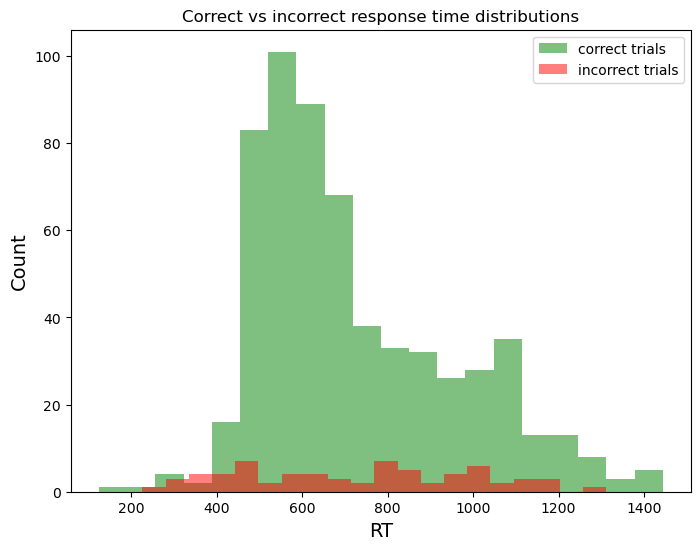

In [42]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
                       facecolor='grey', # Change background colour to grey
                       frameon=False) # Remove background behind the bars

# Here we make two dataframes, one with only correct trials and another with only incorrect trials
correct_trials = df[(df['correct'] == 1)]

# To fix the issue, we make a double conditional: not only should the trial be incorrect, the response also should not be 'None'
incorrect_trials = df[(df['correct'] == 0) & (df['response'] != 'None')]

# Then we make two histograms. Matplotlib will place items you make in the same figure in the same "ax" if you define it so.
ax.hist(correct_trials['response_time'],
        bins=20,
        alpha=0.5, # This defines opacity of the bars
        color='green',
        label="correct trials") # This defines the label that the bar gets, for the legend

ax.hist(incorrect_trials['response_time'],
        bins=20,
        alpha=0.5,
        color='red',
        label="incorrect trials")

ax.set_xlabel("RT", size=14)
ax.set_ylabel("Count", size=14)
ax.set_title("Correct vs incorrect response time distributions")
ax.legend(loc='upper right') # This tells matplotlib to create a legend, and place it on the upper right field of the plot
plt.show()

The anomaly disappears!

The last thing we will show here is how to easily make a histogram plot for each subject/condition. Often the distribution of reaction times does not only differ depending on whether the trial is correct or not, but it also differs per condition or per subject. This is important to keep in mind when you want to do an outlier analysis later: what is an outlier for one subject/condition doesn't have to be an outlier for another subject/condition.

Below we make a so-called facet grid using seaborn. Later you will try to make this using the object-oriented approach, but this is one of the cases where using seaborn is just very convenient.

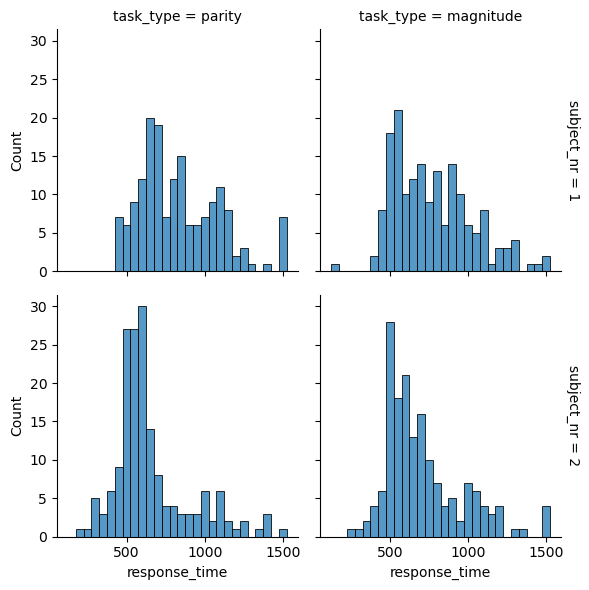

In [43]:
sns.displot(
    df,
    x="response_time", # What to code on the x-axis
    col="task_type", # Column of the grid
    row="subject_nr", # Rows of the grid
    binwidth=50, # Width of the bins
    height=3, # Height of the figure
    facet_kws=dict(margin_titles=True),
)

In [ ]:

#df.head()

#df['acc']
#df.acc

#df.iloc[1]

#print(df['congruency'])

#df.shape

#dfg = df.groupby('subject_nr')
#dfg.mean()

#df.groupby('subject_nr').agg([np.sum, np.mean, np.std])


df['rt_zscore'] = df.groupby(['subject_nr','congruency'])['response_time'].transform(lambda x: (x-x.mean())/x.std())

print(df)


In [ ]:
plt.figure(figsize=(8,6));
plt.hist(df.query("congruency == 'inc' & rt_zscore <= 3").response_time, bins=100, alpha=0.5, label="data1");
plt.hist(df.query("congruency == 'inc' & rt_zscore > 3").response_time, bins=100, alpha=0.5, label="data2");

In [ ]:
import seaborn as sns

df['is_outlier'] = df['rt_zscore'] > 3

sns.set_theme(style="darkgrid")
sns.displot(
    df.query("subject_nr != 0"), x="response_time", col="congruency", row="subject_nr",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True), hue = "is_outlier",
)

In [ ]:
df

In [ ]:
df_sum = df.query("rt_zscore <= 3").groupby(['subject_nr','congruency'])['response_time'].mean()

In [ ]:
df_sum

## Exercise 1
In the first part of the tutorial, we plotted the switch cost using line plots. However, one could argue that bar plots would have been more suitable as we only have two participants. Change the line plot to a bar plot using the object-oriented approach.

In [ ]:
# your answer here

### Exercise 2
We made the facet grid plot in seaborn out of convenience. However, with a bit more code we can also reproduce that plot in the object-oriented approach of matplotlib. Reproduce the plot in this way.

In [ ]:
# A possible answer - REMOVE THIS IN THE FINAL BOOK
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(5.5, 3.5))

df_subj1_parity = df[(df['task_type'] == 'parity') & (df['subject_nr'] == 1)]
df_subj2_parity = df[(df['task_type'] == 'parity') & (df['subject_nr'] == 2)]
df_subj1_magnitude = df[(df['task_type'] == 'magnitude') & (df['subject_nr'] == 1)]
df_subj2_magnitude = df[(df['task_type'] == 'magnitude') & (df['subject_nr'] == 2)]

df_subj1_parity['response_time'].hist(ax=axs[0,0])
df_subj2_parity['response_time'].hist(ax=axs[0,1])
df_subj1_magnitude['response_time'].hist(ax=axs[1,0])
df_subj2_magnitude['response_time'].hist(ax=axs[1,1])

# Set common labels
fig.text(0.28, -0.03, 'Parity', ha='center', va='center')
fig.text(0.75, -0.03, 'Magnitude', ha='center', va='center')

axs[0,0].set_ylabel('Subject 1')
axs[1,0].set_ylabel('Subject 2')

plt.show()

## Exercise 3
In the dataframes exercise from last session you made a dataframe where you identified a cut-off point for you outliers and also made a column which identified the exact trials to exclude. Import that dataframe, and make three plots:
- A histogram plot where you mark the bars above and below the cut-off point (e.g. with red)
- A facet grid plot with histograms where you do the same
- A scatter plot where you plot the response time per condition, and mark the outlier trials (e.g. with red)